# Introduction

In this introduction to our `sklearn` tutorial, we will investigate the basic tools that will be needed for the more machine-learning oriented sections that will follow.

## NumPy

### Basics of `ndarray` type

First, we will present the `numpy` library and its `ndarray` object.

Let us first import this library. As it will be used very often in our code, it is usual to rename it `np` while importing:

In [1]:
import numpy as np

Then, we can create a first array and manipulate it:

In [2]:
arr = np.array([[0, 1], [2, 3], [4, 5]])
print(arr)

[[0 1]
 [2 3]
 [4 5]]


In [3]:
print(2.5 * arr)

[[  0.    2.5]
 [  5.    7.5]
 [ 10.   12.5]]


In [4]:
print(arr + arr)

[[ 0  2]
 [ 4  6]
 [ 8 10]]


In [5]:
print(arr.dtype)  # Data type

int64


In [6]:
print(arr.shape)  # 3 rows, 2 columns

(3, 2)


In [7]:
print(arr.ndim)  # Our array is a matrix and hence has 2 dimensions

2


In this tutorial, we will always consider vectors (`ndim = 1`) or matrices (`ndim = 2`), but `numpy` can be used to manipulate arrays with any number of dimensions.

### Element-wise operations _vs_ matrix products

One important thing to understand with `numpy` is that the usual product between two arrays is an element-wise product, not matrix/vector product:

In [8]:
A = np.array([[0, 1], [2, 3]])
I = np.array([[1, 0], [0, 1]])
print(A)
print(I)

[[0 1]
 [2 3]]
[[1 0]
 [0 1]]


In [9]:
print(A * I)
print(np.dot(A, I))  # np.dot is the matrix product

[[0 0]
 [0 3]]
[[0 1]
 [2 3]]


Similarly, in `numpy`, `A ** 2` is the element-wise square of matrix `A`:

In [10]:
print(A ** 2)
print(np.dot(A, A))

[[0 1]
 [4 9]]
[[ 2  3]
 [ 6 11]]


Quite easily, we can transpose an array:

In [11]:
print(arr.T)

[[0 2 4]
 [1 3 5]]


### Building usual arrays

`numpy` also offers routines to build typical matrices / vectors:

In [12]:
print(np.zeros((2, 3)))

[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [13]:
print(np.ones((2, 3)))

[[ 1.  1.  1.]
 [ 1.  1.  1.]]


In [14]:
print(np.eye(3))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [15]:
print(np.arange(10))  # Returns a vector (ie. an array made of only one dimension)

[0 1 2 3 4 5 6 7 8 9]


In [16]:
print(np.linspace(0, 1, 11))  # Vector of 11 equally spaced values between 0 and 1

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [17]:
np.random.seed(0)             # Set the seed of the random generator to get reproducible results
print(np.random.randn(2, 5))  # randn returns samples drawn from N(0,1)
print(np.random.rand(2, 5))   # rand returns samples drawn uniformly in [0,1)

[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]]
[[ 0.79172504  0.52889492  0.56804456  0.92559664  0.07103606]
 [ 0.0871293   0.0202184   0.83261985  0.77815675  0.87001215]]


### Array slicing and boolean indexing

As for lists, `numpy` arrays can be accessed by slice:

In [18]:
M = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19]])
print(M)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [19]:
print(M[:2, 3:])  # Row indices up to 2 (excluded), Column indices strating from 3 (included)

[[3 4]
 [8 9]]


In [20]:
print(M[1:3, :])  # Row indices 1 (included) to 3 (excluded), All columns

[[ 5  6  7  8  9]
 [10 11 12 13 14]]


Another way to get a subset of a matrix is to use boolean indexing.

Let us assume, for example, that we want to keep only positive components in a vector v:

In [21]:
v = np.array([10, 5, -1, 4, 0, 3])
print(v)
v2 = v[v > 0]  # Keep only strictly positive components from v
print(v2)

[10  5 -1  4  0  3]
[10  5  4  3]


### Operations on arrays

`numpy` offers facilities to compute basic statistics from arrays (sum of their elements, minimum/maximum values, mean, standard deviation, ...). We present some of them in the following:

In [22]:
print(M)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [23]:
print(np.max(M))  # Could also be written M.max()

19


In [24]:
print(np.min(M))  # Could also be written M.min()

0


In [25]:
print(np.mean(M))  # Could also be written M.mean()

9.5


In [26]:
print(np.std(M))  # Could also be written M.std()

5.76628129734


In [27]:
print(np.linalg.norm(M))  # L2-norm by default

49.6990945592


In [28]:
print(np.sum(M))  # Could also be written M.sum()

190


In [29]:
print(np.sum(M, axis=0))  # Column marginals, could also be written M.sum(axis=1)

[30 34 38 42 46]


The latter can also be used on binary vectors, in which cases it corresponds to the number of `True` entries in the array: 

In [30]:
v = np.array([10, 5, -1, 4, 0, 3])
print(np.sum(v > 0))

4


### Element-wise operations

`numpy` also offers many vectorized versions of standard mathematical operations. For these functions, element-wise operations are performed:

In [31]:
print(M)
print(np.sqrt(M))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[ 0.          1.          1.41421356  1.73205081  2.        ]
 [ 2.23606798  2.44948974  2.64575131  2.82842712  3.        ]
 [ 3.16227766  3.31662479  3.46410162  3.60555128  3.74165739]
 [ 3.87298335  4.          4.12310563  4.24264069  4.35889894]]


In [32]:
print(np.exp(v))

[  2.20264658e+04   1.48413159e+02   3.67879441e-01   5.45981500e+01
   1.00000000e+00   2.00855369e+01]


In [33]:
print(np.abs(v))

[10  5  1  4  0  3]


In [34]:
print(np.cos(v))

[-0.83907153  0.28366219  0.54030231 -0.65364362  1.         -0.9899925 ]


### Concatenating and reshaping arrays

We can get a reshaped version of an array, as soon as the number of elements is unchanged:

In [35]:
print(v.reshape((3, 2)))

[[10  5]
 [-1  4]
 [ 0  3]]


Note that this does not change the shape of `v` but rather returns a new array with the required shape.

One can also concatenate several arrays to create new ones. There exists two modes of concatenation:
* horizontal concatenation stacks columns;
* vertical concatenation stacks rows.

Of course, these operations require that corresponding dimensions match.

In [36]:
print(np.hstack((np.zeros((2, 3)), np.ones((2, 5)))))  # Same number of rows

[[ 0.  0.  0.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.]]


In [37]:
print(np.vstack((np.zeros((2, 5)), np.ones((3, 5)))))  # Same number of columns

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


## Plotting with `matplotlib`

`matplotlib` is a library dedicated to plotting data. It features a huge number of plotting facilities. Here, we will only detail a few functions that will be used later in this tutorial.

### Scatter plots

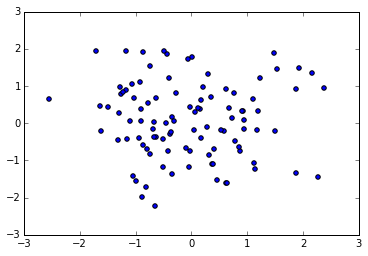

In [38]:
%matplotlib inline 
# You don't need to write the previous line in your scripts, it just means
# "Render matplotlib figures in the notebook"
import matplotlib.pyplot as plt

X = np.random.randn(100, 2)
y = np.array([0] * 50 + [1] * 50)

plt.scatter(X[:, 0], X[:, 1])  # Takes 2 vectors as inputs: x-coordinates and y-coordinates

# NB: if you are coding in a standard Python script (ie. not a notebook as this one),
# you will have to enter the following command for the plot to show up in a new window:
# plt.show()

You might want to draw larger dots:

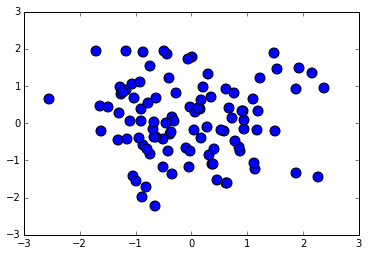

In [39]:
plt.scatter(X[:, 0], X[:, 1], s=100)

You might also want to change the color of the dots or use different colors depending on the class label of each data point:

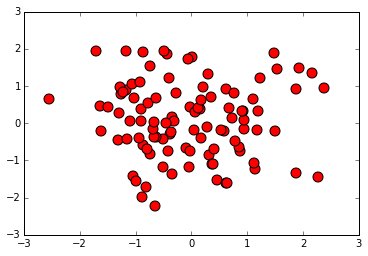

In [40]:
plt.scatter(X[:, 0], X[:, 1], s=100, c="r")  # "r" means red

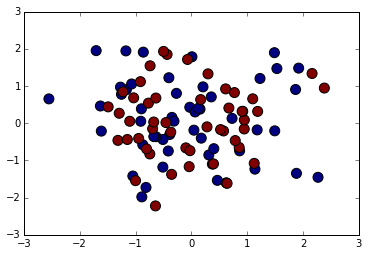

In [41]:
plt.scatter(X[:, 0], X[:, 1], s=100, c=y)

You could also ask for unfilled dots, somewhat transparent dots, or another shape (_ie._ not circles):

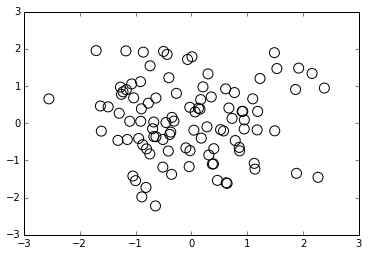

In [42]:
plt.scatter(X[:, 0], X[:, 1], s=100, facecolors="none")

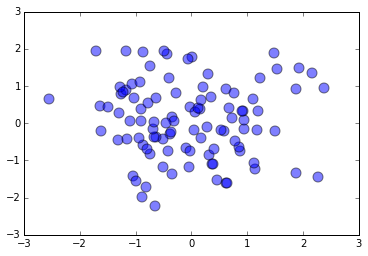

In [43]:
plt.scatter(X[:, 0], X[:, 1], s=100, alpha=0.5)  # alpha should be beetwen 0 and 1

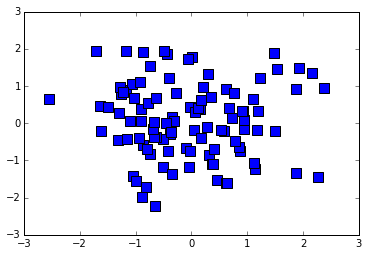

In [44]:
plt.scatter(X[:, 0], X[:, 1], s=100, marker="s")  # "s" means square

### Drawing curves

If you now want to draw curves instead of scatter plots, you can use `plt.plot`:

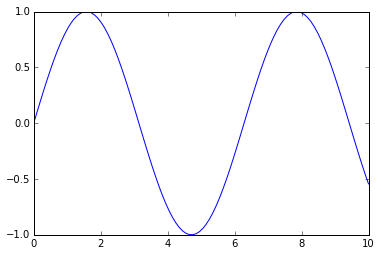

In [45]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)

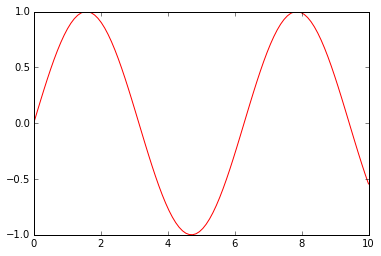

In [46]:
plt.plot(x, y, color="r")

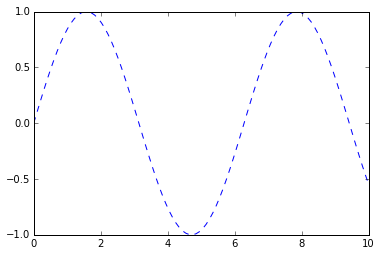

In [47]:
plt.plot(x, y, linestyle="dashed")

### Drawing several items in a single plot

Up to now, we have used a single plot command (`plt.scatter` or `plt.plot`) at a time. However, it is often the case that we want to draw several items in the same plot (_eg._ a scatter plot containing raw data and a fitted regression line).

To do so, we need to encapsulate our plot calls between the creation of a new figure (`plt.figure()`) and a command to either show the plot in a new window or save the figure to a file.

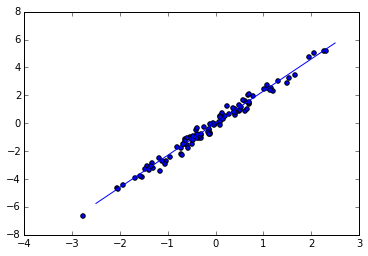

In [48]:
x = np.random.randn(100)
y = 2.3 * x + 0.3 * np.random.randn(100)

xx = np.linspace(-2.5, 2.5, 10)
yy = 2.3 * xx

plt.figure()
plt.scatter(x, y)
plt.plot(xx, yy)
plt.show()
# Alternatively, you could use plt.savefig("regression.pdf")

### Tuning plots

`matplotlib` also makes it easy to set the title of a plot, change x-axis (or y-axis) limits, add a legend, _etc._

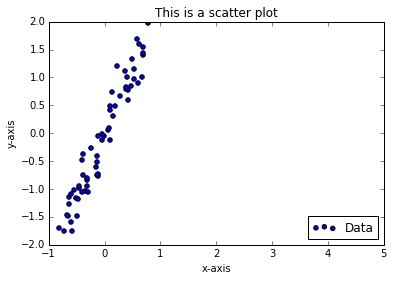

In [49]:
plt.figure()
plt.scatter(x, y, label="Data")
plt.title("This is a scatter plot")
plt.xlim(-1, 5)
plt.ylim(-2, 2)
plt.legend(loc="lower right")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

## Common API for `sklearn` models

`sklearn` models share a very simple common API that makes them very easy-to-use. Using a model consists in:
1. Building it (at this step, hyper parameters of the models are passed);
2. Fitting it to some data;
3. Predicting output of the (already fitted) model for some new data.

In the following, we give examples of these three steps for some standard models (that will be considered in more details in the following sections of this tutorial.

In [50]:
from sklearn.svm import SVC

n_samples = 1000
d = 20

X_train = np.random.randn(n_samples, d)
X_test = np.random.randn(10, d)
y_train = np.array(np.hstack((np.zeros((n_samples // 2, )), np.ones((n_samples // 2, )))))

# Step 1
support_vector_classifier = SVC(kernel="linear")
# Step 2
support_vector_classifier.fit(X_train, y_train)
# Step 3
y_predicted = support_vector_classifier.predict(X_test)
print(y_predicted)

[ 0.  0.  1.  1.  1.  0.  1.  1.  0.  1.]


In [51]:
from sklearn.cluster import KMeans

n_samples = 1000
d = 20

X_train = np.random.randn(n_samples, d)
X_test = np.random.randn(10, d)

# Step 1
kmeans_model = KMeans(n_clusters=5)
# Step 2
kmeans_model.fit(X_train)  # Unsupervised machine learning: no need to pass y for fitting
# Step 3
assign_test = kmeans_model.predict(X_test)
print(assign_test)

[1 3 0 2 4 4 3 2 1 4]


In [52]:
from sklearn.decomposition import PCA

n_samples = 1000
d = 20

X_train = np.random.randn(n_samples, d)
X_test = np.random.randn(10, d)

# Step 1
pca_model = PCA(n_components=2)
# Step 2
pca_model.fit(X_train)  # Unsupervised machine learning: no need to pass y for fitting
# Step 3
X_transformed = pca_model.transform(X_test)
print(X_transformed)

[[-1.33472163  0.79796058]
 [-0.46399731  0.78611098]
 [-0.87449232 -1.83561782]
 [-0.75057156 -1.15396323]
 [ 0.32040141  0.46079091]
 [ 1.5839373   0.647358  ]
 [-0.27961775  0.91918918]
 [ 1.83052297  0.99542658]
 [ 1.78791687 -0.28391957]
 [ 0.94153714  0.06447396]]
